# CITS4403 Project draft code

### Config


In [61]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output
import random

# Agent parameters
NUM_AGENTS = 8

In [72]:
map = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
                [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
                [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
                [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

map_exits = np.where(map == 2)
map_exits = list(zip(map_exits[1], map_exits[0]))
print(map_exits)

[(0, 3), (8, 18), (9, 18)]


In [73]:
class Cell:
    def __init__(self):
        pass


In [74]:
from heapq import heappop, heappush

# A* algorithm modified to compute costs from one exit to all cells
def a_star_from_exit(map, start):
    # Open set is a priority queue of (cost, position) tuples
    open_set = []
    heappush(open_set, (0, start))

    # Store the cost of getting to each point on the map
    g_score = {start: 0}

    # Store the best path to reach each point (optional, not necessary if we just need costs)
    came_from = {}

    while open_set:
        # Get the node with the lowest cost
        current_cost, current = heappop(open_set)

        # Check all possible moves (up, down, left, right)
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)

            # If the neighbor is out of bounds or a wall, skip it
            if (0 <= neighbor[0] < len(map[0]) and
                0 <= neighbor[1] < len(map) and
                map[neighbor[1]][neighbor[0]] == 0):  # Ensure walkable space

                # Calculate tentative g_score
                tentative_g_score = g_score[current] + 1  # Cost to move to neighbor

                # If this is the best path to neighbor, record it
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    heappush(open_set, (tentative_g_score, neighbor))

    return g_score  # Return cost map from the exit to all cells


In [75]:
class Person:
    def __init__(self, map):
        self.map = map
        self.x = 0
        self.y = 0

        self.init_random_position()

    def init_random_position(self):
        while True:
            x = random.randint(0, len(self.map[0]) - 1)
            y = random.randint(0, len(self.map) - 1)
            if self.map[y][x] == 0:
                self.x, self.y = x, y
                break

    def move_randomly(self):
        # Define possible moves: up, down, left, right
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        random.shuffle(moves)

        for move in moves:
            new_x = self.x + move[0]
            new_y = self.y + move[1]
            if 0 <= new_x < len(self.map[0]) and 0 <= new_y < len(self.map):
                # Only move if the new position is not a wall (i.e., map[y][x] == 1 means walkable)
                if self.map[new_y][new_x] == 0:
                    self.x, self.y = new_x, new_y
                    break

    def move_towards_exit(self, exit_costs):
        # Find the nearest exit using precomputed costs
        start = (self.x, self.y)
        nearest_exit = min(exit_costs.keys(), key=lambda exit: exit_costs[exit].get(start, float('inf')))

        # Use the precomputed cost map to find the next step towards the nearest exit
        current_cost = exit_costs[nearest_exit].get(start, float('inf'))
        best_move = start  # Stay in place if no valid move

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor = (self.x + dx, self.y + dy)
            if neighbor in exit_costs[nearest_exit] and exit_costs[nearest_exit][neighbor] < current_cost:
                best_move = neighbor
                current_cost = exit_costs[nearest_exit][neighbor]

        # Move the person to the best move
        self.x, self.y = best_move

In [130]:
class Simulation():
    def __init__(self, map, num_people):
        self.environment = np.array([[Cell() for _ in row] for row in map])

        self.people = [Person(map) for _ in range(num_people)]
        self.exit_costs = {exit: a_star_from_exit(map, exit) for exit in map_exits} # Precompute A* for each exit

    def step(self):
        # Move all people
        for person in self.people:
            person.move_towards_exit(self.exit_costs)

    def draw(self):
        height, width = map.shape

        # Draw map
        _, (ax1, ax2) = plt.subplots(2, 1, figsize=(height, width / 2))
        plt.subplots_adjust(hspace=0.01)

        ax1.axis([0, height, 0, width])
        ax1.set_xticks([])
        ax1.set_yticks([])

        wallsMap = np.where(map == 1, 1, 0)
        options={
            "cmap": 'Greens',
            "alpha": 0.7,
            "vmin": 0, "vmax": 1,
            "interpolation": 'none',
            "origin": 'upper',
            "extent": [0, height, 0, width]
        }

        ax1.imshow(wallsMap, **options)

        # Draw people as green dots
        for person in self.people:
            ax1.plot(person.x + 0.5, height - person.y - 0.5, '.', color='green')

        # Draw the map with numbers
        ax2.axis([0, width, 0, height])
        ax2.set_xticks([])
        ax2.set_yticks([])
        for y in range(height):
            for x in range(width):
                ax2.text(x + 0.5, height - y - 0.5, str(map[y][x]), ha='center', va='center', color='black')

        ax2.imshow(map, cmap='Greys', alpha=0.3, interpolation='none', origin='upper', extent=[0, width, 0, height])

        plt.show()

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.

        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step

        try:
            for _ in range(frames-1):
                self.draw()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
        except KeyboardInterrupt:
            pass

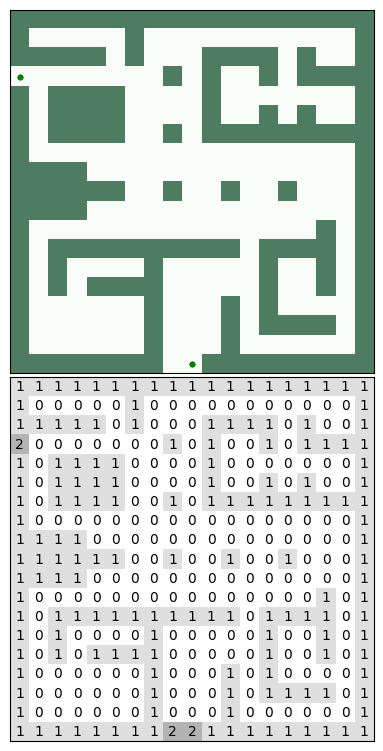

In [131]:
sim = Simulation(map, NUM_AGENTS)

sim.animate(30, 0.05)